# Punto 1

## 3.1 Ejemplo: red binaria no dirigida

In [1]:
# llamamos las librerias 
import networkx as nx
# definimos el grafo a trabajar 
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6), (4,7), (5,6), (6,7)])

In [2]:
# imprimimos el tipo de dato y la direccion de memoria
print(type(G),'\n',id(G))

<class 'networkx.classes.graph.Graph'> 
 2131678210576


In [3]:
# mostrar nodos y la cantidad
print(G.nodes(),'\n',G.number_of_nodes())

[1, 2, 3, 4, 5, 6, 7] 
 7


In [4]:
# aristas y la cantidad
print(G.edges(),'\n',G.number_of_edges())

[(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6), (4, 7), (5, 6), (6, 7)] 
 10


In [5]:
import sys
sys.path.append('../src')
from utilidades import tallo_y_hoja
tallo_y_hoja(G)

1 -- [2, 3]
2 -- [1, 3, 4]
3 -- [1, 2, 5]
4 -- [2, 5, 6, 7]
5 -- [3, 4, 6]
6 -- [4, 5, 7]
7 -- [4, 6]


In [6]:
# es ponderada? 
print(nx.is_weighted(G))

False


In [7]:
# es simple?
print(G.is_multigraph()==False)

True


Text(0.5, 1.0, 'Red binaria no dirigida')

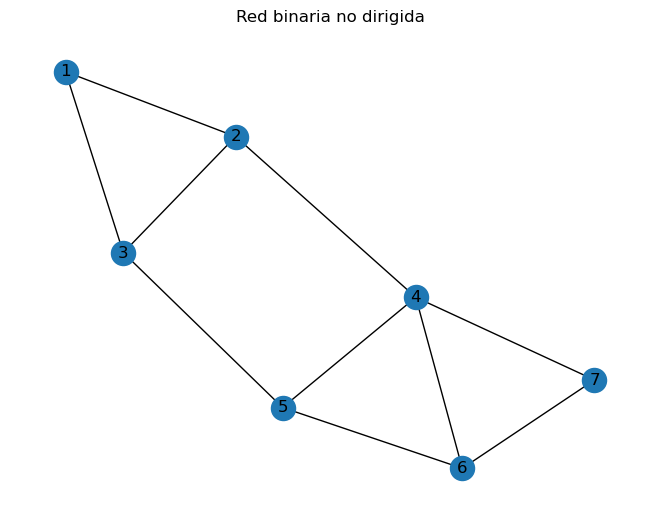

In [8]:
#visualizar el grafo con titulo
import random 
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.title("Red binaria no dirigida")

## 3.2 Ejmplo: red ponderada no dirigida

In [9]:
# red ponderada no dirigida
WG = G.copy()
random.seed(0)
WG.add_weighted_edges_from([(u, v, round(random.uniform(0, 1), 3)) for u, v in WG.edges()]) 
# pesos 
nx.get_edge_attributes(WG, 'weight')

{(1, 2): 0.844,
 (1, 3): 0.758,
 (2, 3): 0.421,
 (2, 4): 0.259,
 (3, 5): 0.511,
 (4, 5): 0.405,
 (4, 6): 0.784,
 (4, 7): 0.303,
 (5, 6): 0.477,
 (6, 7): 0.583}

In [10]:
# ponderada?
print(nx.is_weighted(WG))

True


Text(0.5, 1.0, 'Red Ponderada no dirigida')

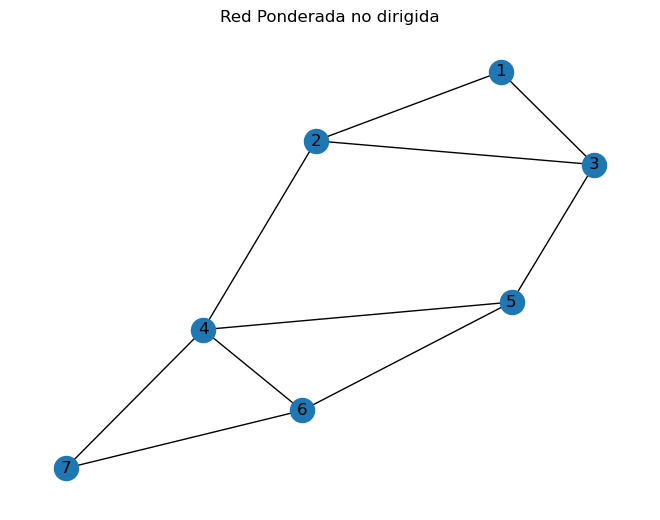

In [11]:
nx.draw(WG, with_labels=True)
plt.title("Red Ponderada no dirigida")

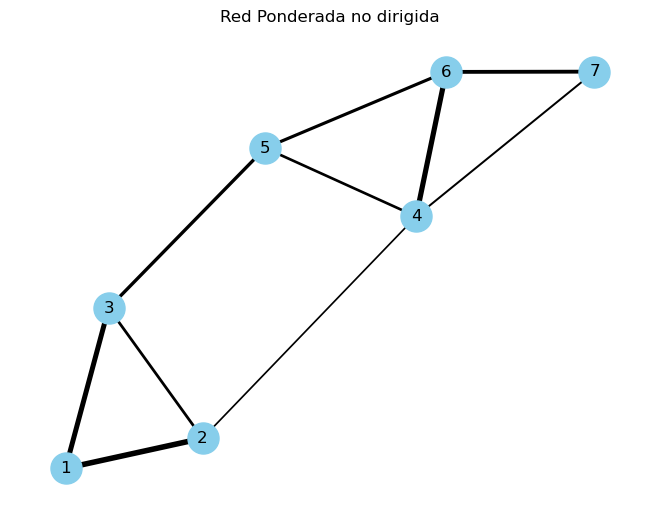

In [12]:
from utilidades import grafico_ponderado

grafico_ponderado(WG,n=4,label='Red Ponderada no dirigida')

## 3.3 Ejemplo: red binaria dirigida

In [13]:
# red binaria dirigida
DG = nx.DiGraph()
DG.add_edges_from([(1,2), (1,3), (2,3)])

In [14]:
# aristas 
print(DG.edges())

[(1, 2), (1, 3), (2, 3)]


In [15]:
# etiquetas
name = ['Juan','Maria','Pedro']
nx.set_node_attributes(DG, dict(enumerate(name, start=1)), 'name')

sexo = ['M','F','M']
nx.set_node_attributes(DG, dict(enumerate(sexo, start=1)), 'sexo')

print([(DG.nodes[u]['name'], DG.nodes[v]['name']) for u, v in DG.edges()])

[('Juan', 'Maria'), ('Juan', 'Pedro'), ('Maria', 'Pedro')]


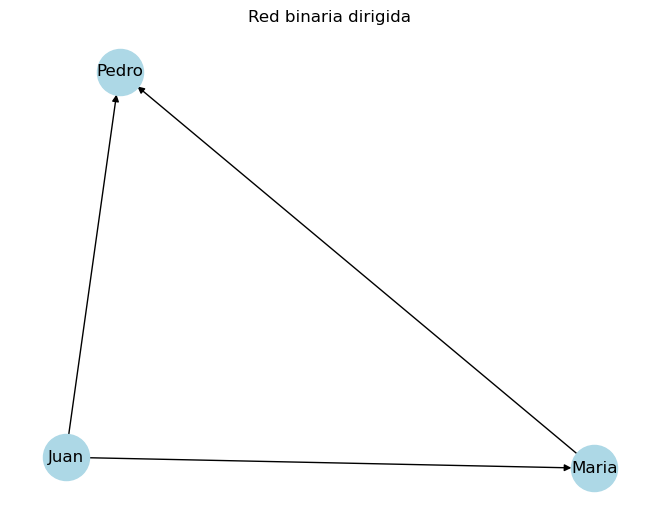

In [16]:
labels = nx.get_node_attributes(DG, 'name')
nx.draw(DG, labels=labels, with_labels=True, node_size=1100, node_color='lightblue')
plt.title("Red binaria dirigida")
plt.show()

## 4.2 Ejemplo: red binaria no dirigida

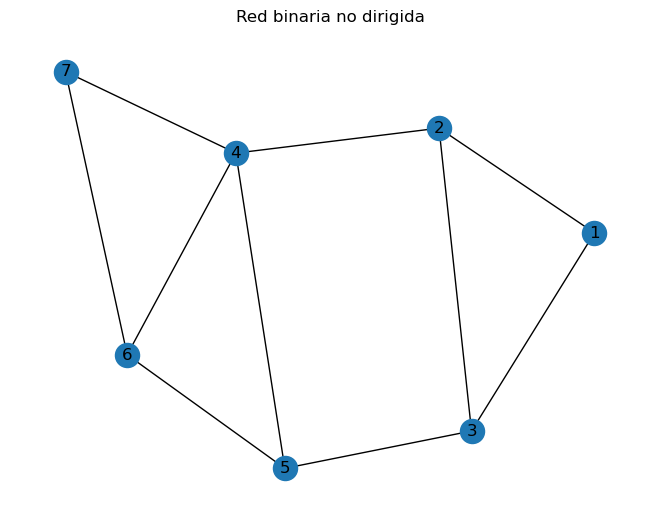

In [17]:
# definimos el grafo    
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6), (4,7), (5,6), (6,7)])
nx.draw(G, with_labels=True)
plt.title("Red binaria no dirigida")
plt.show()

In [18]:
# matriz de adyacencia
A = nx.adjacency_matrix(G)
# tipo de objeto
type(A)

scipy.sparse._csr.csr_array

In [19]:
# imprimir la matriz
print(A)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 4)	1
  (3, 1)	1
  (3, 4)	1
  (3, 5)	1
  (3, 6)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1
  (5, 3)	1
  (5, 4)	1
  (5, 6)	1
  (6, 3)	1
  (6, 5)	1


In [20]:
# formato de matriz
Y = A.todense()
print(Y)
type(Y)

[[0 1 1 0 0 0 0]
 [1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [0 1 0 0 1 1 1]
 [0 0 1 1 0 1 0]
 [0 0 0 1 1 0 1]
 [0 0 0 1 0 1 0]]


numpy.ndarray

In [21]:
# es simertrica?
import numpy as np
np.array_equal(Y, Y.T)

True

In [22]:
# 
yvec1 = [Y[i, j] for i in range(Y.shape[0]) for j in range(Y.shape[1]) if i > j]
yvec1

[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]

In [23]:
yvec2 = np.where(np.array(yvec1) == 1)[0]
yvec2

array([ 0,  1,  2,  4,  8,  9, 13, 14, 18, 20], dtype=int64)

# 4.4 Ejemplo: red binaria no dirigida (cont.)

In [24]:
# se encuentran los indices de los elementos iguales a 1
indices = np.argwhere(np.tril(Y) == 1)
# ajustamos los indices sumando 1 para que coincidan con los nodos
edges = [(i+1, j+1) for i, j in indices]
# convertimos a matriz
edges = np.array(edges)
# clase de objeto
print(type(edges))
# mostramos la matriz
print(edges)

<class 'numpy.ndarray'>
[[2 1]
 [3 1]
 [3 2]
 [4 2]
 [5 3]
 [5 4]
 [6 4]
 [6 5]
 [7 4]
 [7 6]]


# Punto 2 

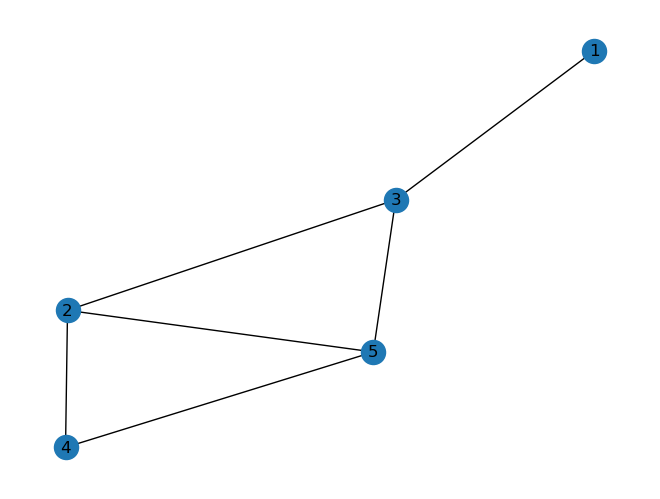

In [25]:
# visualizamos el grafo
G = nx.Graph()
G.add_edges_from([(1, 3), (2, 3), (2, 4), (2, 5), (3, 1), (3, 5), (4, 5), (5, 4)])
nx.draw(G, with_labels=True)

In [26]:
# b) calcular el orden, tamaño y el diámetro  del grafo
# orden
print(G.order()) 
# tamaño
print(G.size())
# diámetro
print(nx.diameter(G))

5
6
3


In [27]:
# c) calcular el grado de los nodos
print(G.degree())

[(1, 1), (3, 3), (2, 3), (4, 2), (5, 3)]


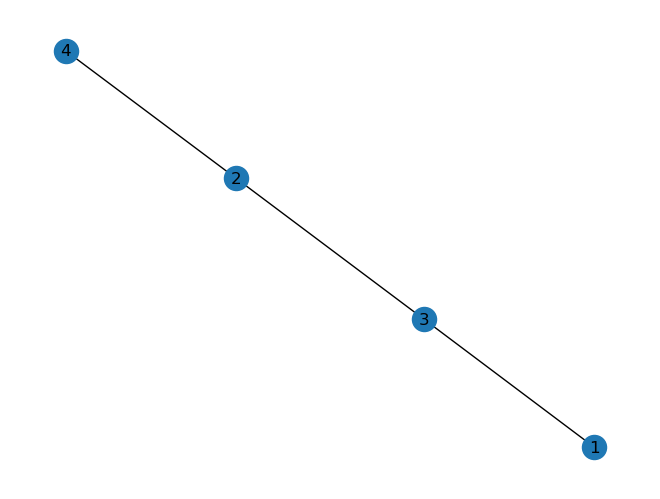

In [28]:
# d)  Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.
H = G.subgraph([1, 2, 3, 4])
nx.draw(H, with_labels=True)

# punto 3

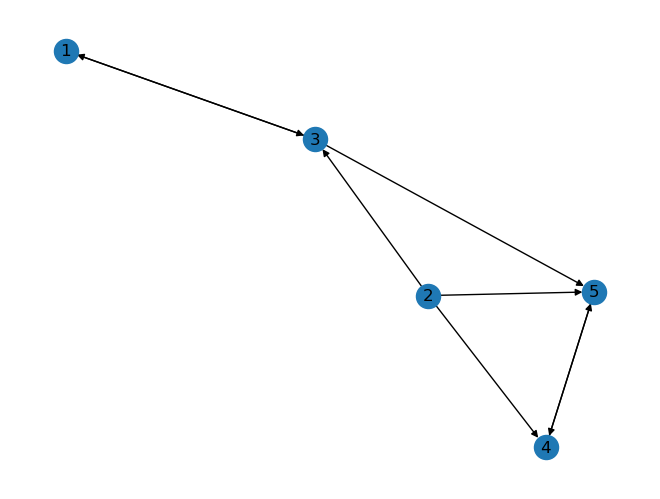

In [29]:
# a) Visualizar G.
# definimos el grafo
DG = nx.DiGraph()
# agregamos las aristas
DG.add_edges_from([(1, 3), (2, 3), (2, 4), (2, 5), (3, 1), (3, 5), (4, 5), (5, 4)])
# visualizamos el grafo
nx.draw(DG, with_labels=True)

In [30]:
# b) calcular el orden, tamaño y el diámetro  del grafo
# orden
print(DG.order()) 
# tamaño
print(DG.size())
# diámetro
# para esto tenemos que verificar si el grafo es fuerte o debilmente conectado
if nx.is_strongly_connected(DG):
    print(nx.diameter(DG))
else:
    print('El grafo no es fuerte conectado')
    # verificamos que componentes estan fuertemente conectados 
    componentes = list(nx.strongly_connected_components(DG))
    # guardamos el componente mas grande
    diametros = []
    for componente in componentes:
        componente_subgrafo = DG.subgraph(componente)
        diametros.append(nx.diameter(componente_subgrafo))
    diametro = max(diametros)    
    print(diametro)

5
8
El grafo no es fuerte conectado
1


In [31]:
#c) calcular el grado de los nodos
# grado de entrada
print(DG.in_degree())
# grado de salida
print(DG.out_degree())
# grado total
print(DG.degree())

[(1, 1), (3, 2), (2, 0), (4, 2), (5, 3)]
[(1, 1), (3, 2), (2, 3), (4, 1), (5, 1)]
[(1, 2), (3, 4), (2, 3), (4, 3), (5, 4)]


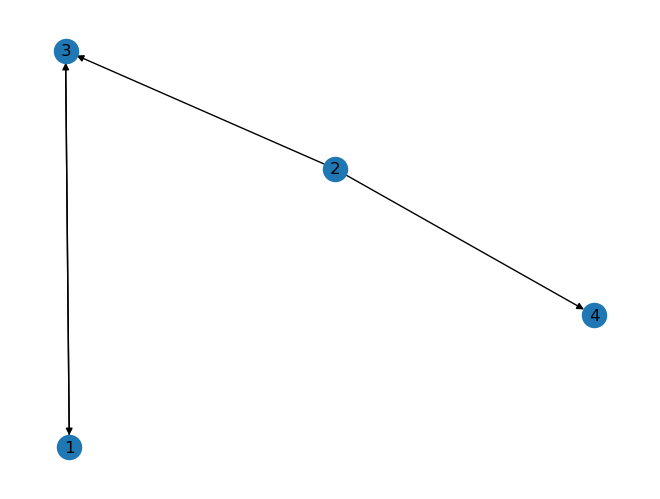

In [32]:
# d) Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.
H = DG.subgraph([1, 2, 3, 4])
nx.draw(H, with_labels=True)


# punto 4

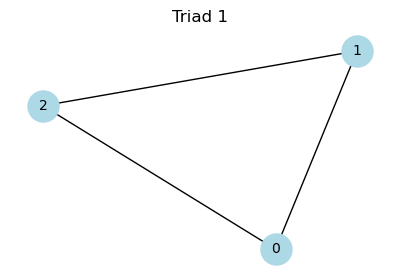

Estados isomorfos:


In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo completo con 3 nodos
G = nx.complete_graph(3)

# Obtener todas las triplas de nodos (posibles triadas)
triads = [(u, v, w) for u in G.nodes() for v in G.nodes() for w in G.nodes() if u < v < w]

# Función para graficar los estados triádicos
def plot_triads(triads):
    plt.figure(figsize=(12, 8))
    for i, triad in enumerate(triads):
        plt.subplot(3, 3, i + 1)
        triad_graph = nx.Graph()
        triad_graph.add_edges_from([(triad[0], triad[1]), (triad[1], triad[2]), (triad[0], triad[2])])
        nx.draw(triad_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
        plt.title(f'Triad {i + 1}')
    plt.tight_layout()
    plt.show()

# Graficar todos los estados triádicos
plot_triads(triads)

# Identificar estados isomorfos
isomorphisms = []
for i, triad1 in enumerate(triads):
    for j, triad2 in enumerate(triads):
        if i < j:
            triad_graph1 = nx.Graph()
            triad_graph2 = nx.Graph()
            triad_graph1.add_edges_from([(triad1[0], triad1[1]), (triad1[1], triad1[2]), (triad1[0], triad1[2])])
            triad_graph2.add_edges_from([(triad2[0], triad2[1]), (triad2[1], triad2[2]), (triad2[0], triad2[2])])
            if nx.is_isomorphic(triad_graph1, triad_graph2):
                isomorphisms.append((triad1, triad2))

# Imprimir estados isomorfos
print("Estados isomorfos:")
for iso in isomorphisms:
    print(iso)


In [34]:
triads

[(0, 1, 2)]